In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
from astropy.visualization import simple_norm

In [2]:
fits.Conf.use_memmap = True

In [5]:
example_fits_path = 'image.fits'

In [6]:
with fits.open(example_fits_path) as hdulist:
    data = hdulist[0].data.astype(np.float32)

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


In [7]:
bkg = sep.Background(data)
data_sub = data - bkg

In [8]:
objects = sep.extract(data_sub, 1.5)

In [9]:
figures = []

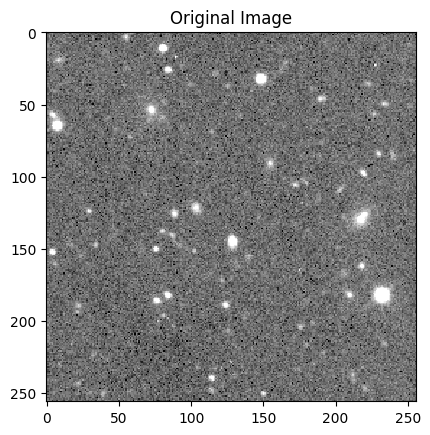

In [10]:
fig1, ax1 = plt.subplots()
m, s = np.mean(data), np.std(data)
norm = simple_norm(data, 'sqrt', percent=99.)
ax1.imshow(data, interpolation='nearest', cmap='gray', norm=norm)
ax1.set_title('Original Image')
figures.append((fig1, "figure1_original_image.png"))

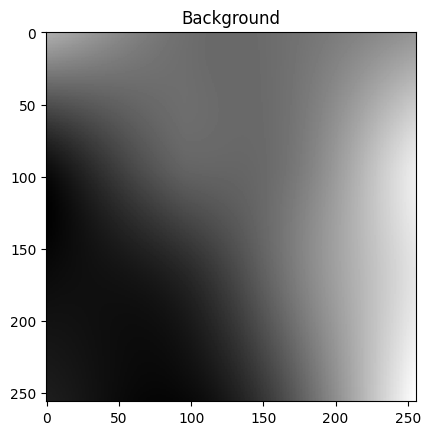

In [11]:
fig2, ax2 = plt.subplots()
ax2.imshow(bkg.back(), interpolation='nearest', cmap='gray')
ax2.set_title('Background')
figures.append((fig2, "figure2_background.png"))

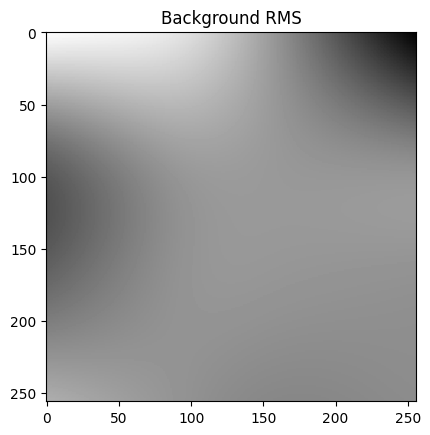

In [12]:
fig3, ax3 = plt.subplots()
ax3.imshow(bkg.rms(), interpolation='nearest', cmap='gray')
ax3.set_title('Background RMS')
figures.append((fig3, "figure3_background_rms.png"))

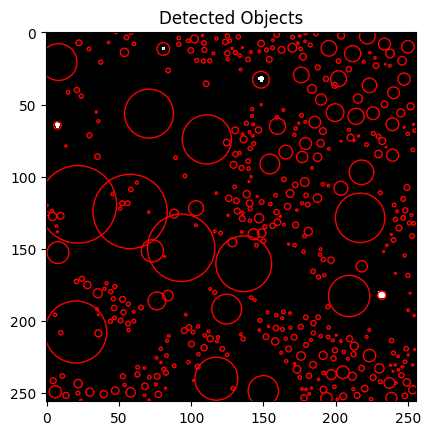

In [13]:
fig4, ax4 = plt.subplots()
ax4.imshow(data_sub, interpolation='nearest', cmap='gray', norm=norm)
for obj in objects:
    e = plt.Circle((obj['x'], obj['y']), obj['a'], color='red', fill=False)
    ax4.add_patch(e)
ax4.set_title('Detected Objects')
figures.append((fig4, "figure4_detected_objects.png"))

In [15]:
for fig, filename in figures:
    fig.savefig(f"{filename}")

In [16]:
[filename for _, filename in figures]

['figure1_original_image.png',
 'figure2_background.png',
 'figure3_background_rms.png',
 'figure4_detected_objects.png']